In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing data 

In [52]:
data = pd.read_csv("C:/Users/ASRA/Downloads/Student Mental health.csv")
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# DATA CLEANING 

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [54]:
data= data[data['Age'].notna()]
data.shape

(100, 11)

In [10]:
data.head

<bound method NDFrame.head of                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0            

In [ ]:
# Rename Columns 

In [55]:
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)


,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [56]:
data['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [ ]:
# First 3 years of data after clearing text 

In [57]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
data["Year"] = data["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(data["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



In [58]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [59]:
def remove_space(string):
    string = string.strip()
    return string
data["CGPA"] = data["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(data["CGPA"][:3], "\n")
print(data['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [60]:
#Let's replace redundant course name with the standard course name
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

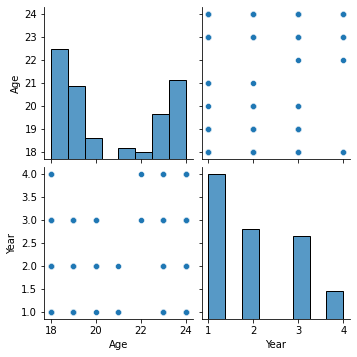

In [61]:
sns.pairplot(data)

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

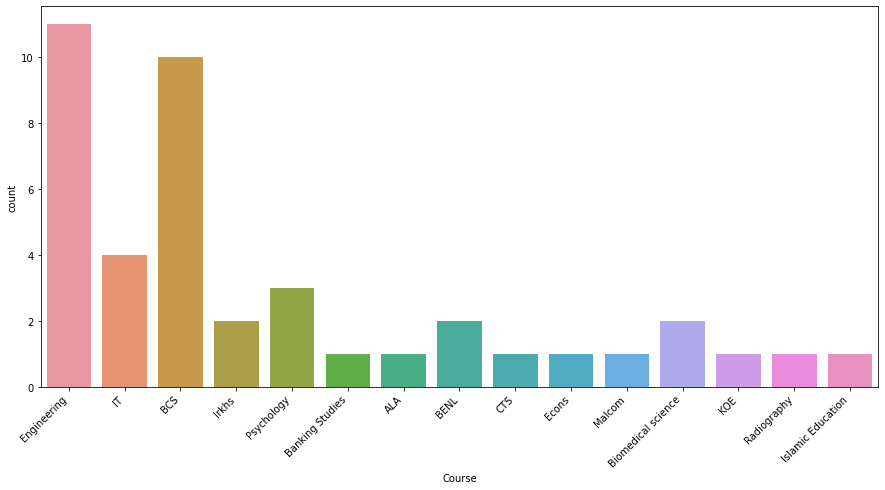

In [62]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

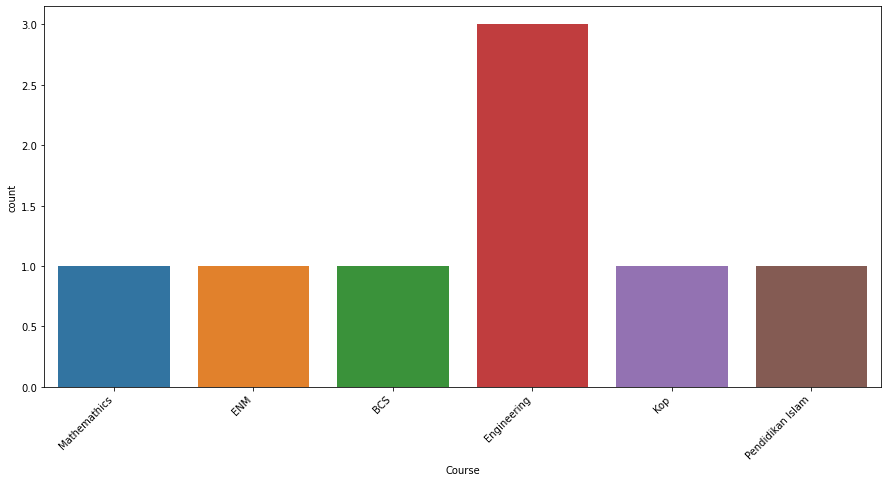

In [63]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

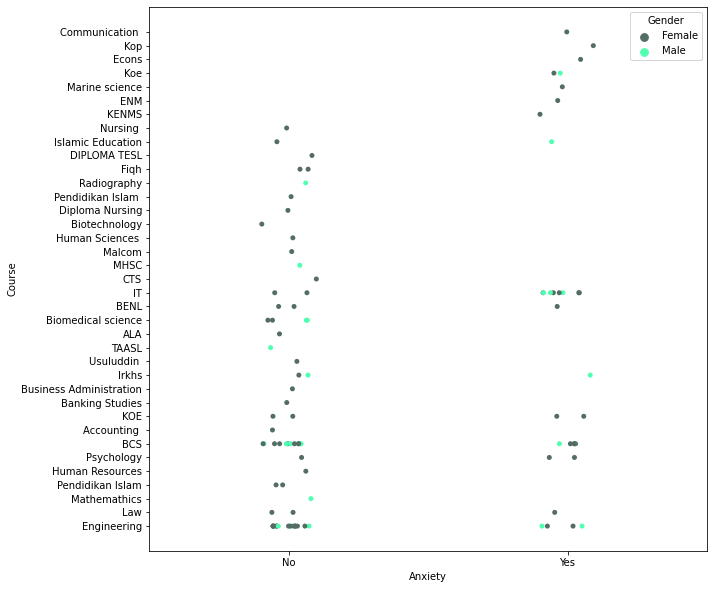

In [64]:
#Year-wise analysis of students from different courses
#Here are some of the stats:
#Maximum students from Year 4 are from Engineering.
#Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
#Engineering, BCS and IT students rule the survey with maximum number of responses.

plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

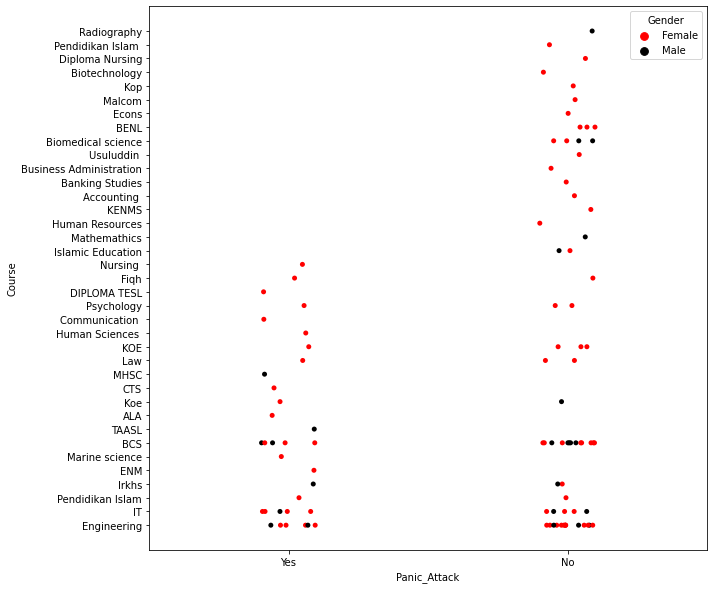

In [65]:
# Depression vs Course
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Panic_Attack', y = 'Course', hue = 'Gender', data = data, palette = ['red', 'black'])
plt.show()

<AxesSubplot:>

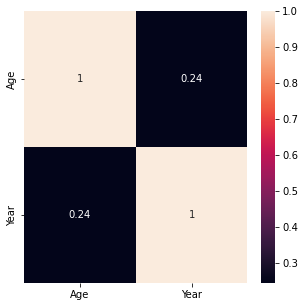

In [66]:
#correlation matrix
#Year 1 students aged 18- 20 despite having decent GPAs experience mental breakdowns. How is that possible? 
#Maybe self-doubt, imposter syndrome, etc. (Just an assumption)
corrmat= data.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corrmat,annot=True, cmap=None)

In [68]:
#  Data Preprocessing ##
data.drop('Timestamp', axis=1, inplace=True)
data.head(20)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


<AxesSubplot:>

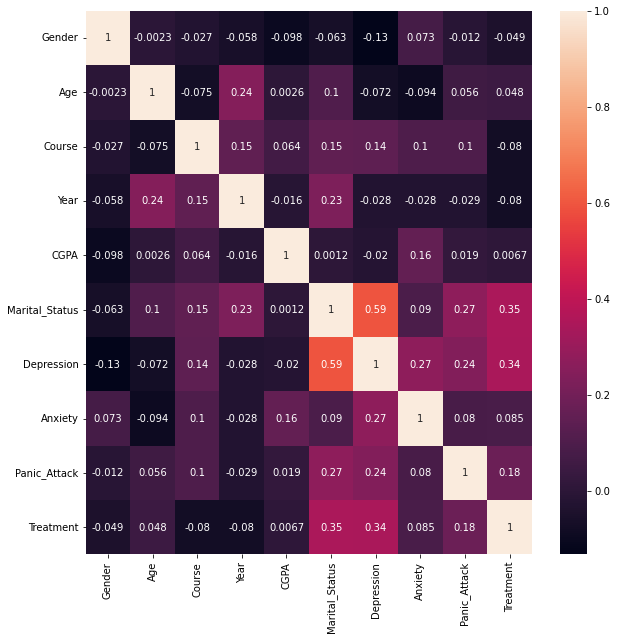

In [70]:
corrmat= data.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

In [71]:
# Model Selection # 
X = data.drop(["CGPA"],axis=1)
y = data["CGPA"]
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [72]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    cv_results_accuracy = []
    
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.557143 
Decision Tree: 0.471429 
RandomForest: 0.614286 
SVC: 0.500000 


In [73]:
###Model Evaluation ##
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.5


In [74]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.5

In [75]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.5
Recall      :  0.5
Precision   :  0.4579710144927536
F1 Score    :  0.5


In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.48      0.92      0.63        12
           4       0.57      0.29      0.38        14

    accuracy                           0.50        30
   macro avg       0.21      0.24      0.20        30
weighted avg       0.46      0.50      0.43        30



<AxesSubplot:>

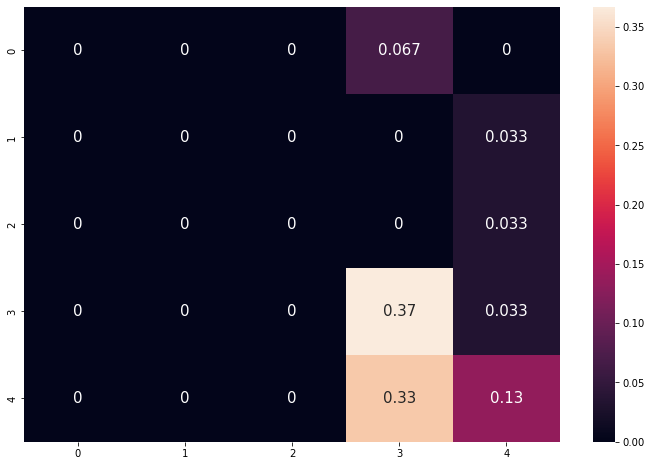

In [77]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})